# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amderma
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 2 of Set 1 | busselton
{'coord': {'lon': 115.3333, 'lat': -33.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 15.08, 'feels_like': 14.71, 'temp_min': 15.08, 'temp_max': 15.08, 'pressure': 1010, 'humidity': 79, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.37, 'deg': 160, 'gust': 3.05}, 'clouds': {'all': 3}, 'dt': 1669937365, 'sys': {'country': 'AU', 'sunrise': 1669928493, 'sunset': 1669979678}, 'timezone': 28800, 'id': 2075265, 'name': 'Busselton', 'cod': 200}
Processing Record 3 of Set 1 | jamestown
{'coord': {'lon': -79.2353, 'lat': 42.097}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -2.77, 'feels_li

{'coord': {'lon': -76.5007, 'lat': 0.5133}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.49, 'feels_like': 25.27, 'temp_min': 24.49, 'temp_max': 24.49, 'pressure': 1005, 'humidity': 87, 'sea_level': 1005, 'grnd_level': 976}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 22, 'gust': 5.1}, 'clouds': {'all': 65}, 'dt': 1669937489, 'sys': {'country': 'CO', 'sunrise': 1669891950, 'sunset': 1669935481}, 'timezone': -18000, 'id': 3671549, 'name': 'Puerto Asís', 'cod': 200}
Processing Record 21 of Set 1 | dmitriyevka
{'coord': {'lon': 55.3333, 'lat': 54.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -20.29, 'feels_like': -20.29, 'temp_min': -20.29, 'temp_max': -20.25, 'pressure': 1046, 'humidity': 100, 'sea_level': 1046, 'grnd_level': 1023}, 'visibility': 6368, 'wind': {'speed': 1.12, 'deg': 338, 'gust': 1.11}, 'cloud

{'coord': {'lon': -34.9075, 'lat': -7.2597}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 26.7, 'feels_like': 28.64, 'temp_min': 26.7, 'temp_max': 26.7, 'pressure': 1013, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1669937491, 'sys': {'type': 1, 'id': 8391, 'country': 'BR', 'sunrise': 1669881212, 'sunset': 1669926248}, 'timezone': -10800, 'id': 3385077, 'name': 'Conde', 'cod': 200}
Processing Record 41 of Set 1 | luderitz
{'coord': {'lon': 15.1594, 'lat': -26.6481}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 17.12, 'feels_like': 17.11, 'temp_min': 17.12, 'temp_max': 17.12, 'pressure': 1012, 'humidity': 85, 'sea_level': 1012, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 8.68, 'deg': 170, 'gust': 13.75}, 'clouds': {'all': 0}, 'dt': 1669937491, 'sys': {'countr

{'coord': {'lon': -25.4333, 'lat': 37.7167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 14, 'feels_like': 13.34, 'temp_min': 14, 'temp_max': 14.23, 'pressure': 1026, 'humidity': 72, 'sea_level': 1026, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 10.56, 'deg': 342, 'gust': 13.09}, 'clouds': {'all': 73}, 'dt': 1669937493, 'sys': {'type': 2, 'id': 37781, 'country': 'PT', 'sunrise': 1669883897, 'sunset': 1669919015}, 'timezone': -3600, 'id': 3372472, 'name': 'Vila Franca do Campo', 'cod': 200}
Processing Record 10 of Set 2 | blackwater
{'coord': {'lon': 148.8833, 'lat': -23.5833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 23.19, 'feels_like': 22.84, 'temp_min': 23.19, 'temp_max': 23.19, 'pressure': 1010, 'humidity': 49, 'sea_level': 1010, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 4.01, 'deg': 14

{'coord': {'lon': -155.09, 'lat': 19.7297}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.74, 'feels_like': 29.09, 'temp_min': 24.79, 'temp_max': 29.04, 'pressure': 1013, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 20}, 'clouds': {'all': 100}, 'dt': 1669937367, 'sys': {'type': 1, 'id': 7881, 'country': 'US', 'sunrise': 1669912737, 'sunset': 1669952427}, 'timezone': -36000, 'id': 5855927, 'name': 'Hilo', 'cod': 200}
Processing Record 28 of Set 2 | vao
{'coord': {'lon': 167.4833, 'lat': -22.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.04, 'feels_like': 26.04, 'temp_min': 26.04, 'temp_max': 26.04, 'pressure': 1004, 'humidity': 86, 'sea_level': 1004, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 9.62, 'deg': 348, 'gust': 13.81}, 'clouds': {'all': 97}, 'dt': 1669937496, 'sys

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 45 of Set 2 | kano
{'coord': {'lon': 8.5167, 'lat': 12.0001}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.72, 'feels_like': 20.5, 'temp_min': 21.72, 'temp_max': 21.72, 'pressure': 1011, 'humidity': 21, 'sea_level': 1011, 'grnd_level': 956}, 'visibility': 10000, 'wind': {'speed': 3.17, 'deg': 51, 'gust': 4.69}, 'clouds': {'all': 59}, 'dt': 1669937498, 'sys': {'country': 'NG', 'sunrise': 1669959087, 'sunset': 1670000370}, 'timezone': 3600, 'id': 2335204, 'name': 'Kano', 'cod': 200}
Processing Record 46 of Set 2 | bur gabo
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 47 of Set 2 | lagoa
{'coord': {'lon': -27.9833, 'lat': 39.05}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.76, 'feels_li

{'coord': {'lon': 24.7314, 'lat': -34.0033}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 16.05, 'feels_like': 15.98, 'temp_min': 16.05, 'temp_max': 16.05, 'pressure': 1007, 'humidity': 87, 'sea_level': 1007, 'grnd_level': 981}, 'visibility': 10000, 'wind': {'speed': 2.9, 'deg': 255, 'gust': 5.69}, 'clouds': {'all': 5}, 'dt': 1669937500, 'sys': {'type': 2, 'id': 2035063, 'country': 'ZA', 'sunrise': 1669950183, 'sunset': 1670001489}, 'timezone': 7200, 'id': 986717, 'name': 'Kruisfontein', 'cod': 200}
Processing Record 19 of Set 3 | talnakh
{'coord': {'lon': 88.3972, 'lat': 69.4865}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -16.91, 'feels_like': -21.49, 'temp_min': -16.91, 'temp_max': -16.91, 'pressure': 1033, 'humidity': 99, 'sea_level': 1033, 'grnd_level': 1023}, 'visibility': 226, 'wind': {'speed': 1.69, 'deg': 174, 'gust': 1.8

{'coord': {'lon': 29.3644, 'lat': -3.3822}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.08, 'feels_like': 21.65, 'temp_min': 21.08, 'temp_max': 21.08, 'pressure': 1013, 'humidity': 92, 'sea_level': 1013, 'grnd_level': 923}, 'visibility': 10000, 'wind': {'speed': 1.56, 'deg': 21, 'gust': 2.05}, 'clouds': {'all': 99}, 'dt': 1669937340, 'sys': {'country': 'BI', 'sunrise': 1669952581, 'sunset': 1669996866}, 'timezone': 7200, 'id': 425378, 'name': 'Bujumbura', 'cod': 200}
Processing Record 37 of Set 3 | genhe
{'coord': {'lon': 121.5167, 'lat': 50.7833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -22.16, 'feels_like': -22.16, 'temp_min': -22.16, 'temp_max': -22.16, 'pressure': 1016, 'humidity': 99, 'sea_level': 1016, 'grnd_level': 923}, 'visibility': 584, 'wind': {'speed': 1.15, 'deg': 165, 'gust': 2.07}, 'clouds': {'a

{'coord': {'lon': -120.2362, 'lat': 55.7666}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -27.2, 'feels_like': -27.2, 'temp_min': -27.2, 'temp_max': -27.2, 'pressure': 1009, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1669937230, 'sys': {'type': 1, 'id': 783, 'country': 'CA', 'sunrise': 1669910810, 'sunset': 1669937619}, 'timezone': -25200, 'id': 5935804, 'name': 'Dawson Creek', 'cod': 200}
Processing Record 6 of Set 4 | swan hill
{'coord': {'lon': 143.5544, 'lat': -35.3378}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 21.12, 'feels_like': 20.57, 'temp_min': 21.12, 'temp_max': 21.12, 'pressure': 1015, 'humidity': 49, 'sea_level': 1015, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 3.34, 'deg': 99, 'gust': 4.24}, 'clouds': {'all': 0}, 'dt': 1669937369, 'sys': {'cou

{'coord': {'lon': 55.7077, 'lat': 51.9337}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -14.14, 'feels_like': -21.14, 'temp_min': -14.14, 'temp_max': -14.14, 'pressure': 1042, 'humidity': 93, 'sea_level': 1042, 'grnd_level': 1024}, 'visibility': 1485, 'wind': {'speed': 3.92, 'deg': 100, 'gust': 6.93}, 'clouds': {'all': 98}, 'dt': 1669937509, 'sys': {'type': 1, 'id': 9044, 'country': 'RU', 'sunrise': 1669953818, 'sunset': 1669982981}, 'timezone': 18000, 'id': 498666, 'name': 'Chebenki', 'cod': 200}
Processing Record 24 of Set 4 | valpoi
{'coord': {'lon': 74.1356, 'lat': 15.5305}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 23.76, 'feels_like': 24.02, 'temp_min': 23.76, 'temp_max': 23.76, 'pressure': 1010, 'humidity': 70, 'sea_level': 1010, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 78, 'gust': 1

{'coord': {'lon': -79.9309, 'lat': 32.7766}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 8.36, 'feels_like': 7.73, 'temp_min': 6.13, 'temp_max': 10.01, 'pressure': 1030, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1669937345, 'sys': {'type': 2, 'id': 2008639, 'country': 'US', 'sunrise': 1669896262, 'sunset': 1669932816}, 'timezone': -18000, 'id': 4574324, 'name': 'Charleston', 'cod': 200}
Processing Record 44 of Set 4 | mitsamiouli
{'coord': {'lon': 43.2844, 'lat': -11.3847}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 25.69, 'feels_like': 26.25, 'temp_min': 25.69, 'temp_max': 25.69, 'pressure': 1011, 'humidity': 74, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.2, 'deg': 36, 'gust': 2.45}, 'clouds': {'all': 9}, 'dt': 1669937513, 'sys': {'

{'coord': {'lon': 1.3862, 'lat': 51.3813}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 8.25, 'feels_like': 8.25, 'temp_min': 6.73, 'temp_max': 8.72, 'pressure': 1026, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 330, 'gust': 0.89}, 'clouds': {'all': 89}, 'dt': 1669937516, 'sys': {'type': 2, 'id': 2072746, 'country': 'GB', 'sunrise': 1669880231, 'sunset': 1669909804}, 'timezone': 0, 'id': 2643044, 'name': 'Margate', 'cod': 200}
Processing Record 13 of Set 5 | longyearbyen
{'coord': {'lon': 15.6401, 'lat': 78.2186}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 5.91, 'feels_like': 2.41, 'temp_min': 5.91, 'temp_max': 5.91, 'pressure': 1030, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 180}, 'clouds': {'all': 75}, 'dt': 1669937374, 'sys': {'type': 1, 'id': 1663, 'country': 'SJ', 'su

{'coord': {'lon': 156.125, 'lat': 50.6789}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -2.47, 'feels_like': -7.72, 'temp_min': -2.47, 'temp_max': -2.47, 'pressure': 1010, 'humidity': 73, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 4.56, 'deg': 184, 'gust': 7.69}, 'clouds': {'all': 83}, 'dt': 1669937380, 'sys': {'country': 'RU', 'sunrise': 1669929353, 'sunset': 1669959233}, 'timezone': 39600, 'id': 2121385, 'name': "Severo-Kuril'sk", 'cod': 200}
Processing Record 31 of Set 5 | lompoc
{'coord': {'lon': -120.4579, 'lat': 34.6391}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 13.84, 'feels_like': 13.21, 'temp_min': 13.3, 'temp_max': 14.45, 'pressure': 1014, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 160, 'gust': 8.23}, 'clouds': {'all': 100}, 'dt': 1669937518, 'sys': {'type':

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 1 of Set 6 | oromocto
{'coord': {'lon': -66.4792, 'lat': 45.8351}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 0, 'feels_like': -5, 'temp_min': -0.94, 'temp_max': 0.08, 'pressure': 1012, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 250, 'gust': 9.26}, 'clouds': {'all': 20}, 'dt': 1669937522, 'sys': {'type': 1, 'id': 778, 'country': 'CA', 'sunrise': 1669895216, 'sunset': 1669927403}, 'timezone': -14400, 'id': 6094407, 'name': 'Oromocto', 'cod': 200}
Processing Record 2 of Set 6 | leningradskiy
{'coord': {'lon': 178.4167, 'lat': 69.3833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -2.87, 'feels_like': -7.81, 'temp_min': -2.87, 'temp_max': -2.87, 'pressure': 996, 'humidity': 83, 'sea_level': 996, 'grnd_level': 9

{'coord': {'lon': 40.1025, 'lat': 47.6931}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -3.33, 'feels_like': -10.33, 'temp_min': -3.33, 'temp_max': -3.33, 'pressure': 1033, 'humidity': 44, 'sea_level': 1033, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 8.42, 'deg': 88, 'gust': 18.22}, 'clouds': {'all': 96}, 'dt': 1669937527, 'sys': {'type': 1, 'id': 8971, 'country': 'RU', 'sunrise': 1669956492, 'sunset': 1669987799}, 'timezone': 10800, 'id': 528242, 'name': 'Mayskiy', 'cod': 200}
Processing Record 21 of Set 6 | bunia
{'coord': {'lon': 30.25, 'lat': 1.5667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.82, 'feels_like': 15.89, 'temp_min': 15.82, 'temp_max': 15.82, 'pressure': 1011, 'humidity': 93, 'sea_level': 1011, 'grnd_level': 874}, 'visibility': 10000, 'wind': {'speed': 0.68, 'deg': 315, 'gust': 1.2

{'coord': {'lon': -68.9333, 'lat': -22.4667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 16.27, 'feels_like': 14.24, 'temp_min': 16.27, 'temp_max': 16.27, 'pressure': 1023, 'humidity': 11}, 'visibility': 10000, 'wind': {'speed': 10.8, 'deg': 270}, 'clouds': {'all': 0}, 'dt': 1669937425, 'sys': {'type': 1, 'id': 8480, 'country': 'CL', 'sunrise': 1669887775, 'sunset': 1669936022}, 'timezone': -10800, 'id': 3897347, 'name': 'Calama', 'cod': 200}
Processing Record 45 of Set 6 | ust-kulom
{'coord': {'lon': 53.6902, 'lat': 61.6864}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -18.08, 'feels_like': -21.97, 'temp_min': -18.08, 'temp_max': -18.08, 'pressure': 1050, 'humidity': 99, 'sea_level': 1050, 'grnd_level': 1034}, 'visibility': 10000, 'wind': {'speed': 1.35, 'deg': 150, 'gust': 2.55}, 'clouds': {'all': 71}, 'dt': 1669937531, 's

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 12 of Set 7 | komagane
{'coord': {'lon': 137.9396, 'lat': 35.7296}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 1.3, 'feels_like': -0.12, 'temp_min': 1.3, 'temp_max': 1.94, 'pressure': 1022, 'humidity': 51, 'sea_level': 1022, 'grnd_level': 942}, 'visibility': 10000, 'wind': {'speed': 1.4, 'deg': 323, 'gust': 1.82}, 'clouds': {'all': 77}, 'dt': 1669937534, 'sys': {'type': 2, 'id': 20029, 'country': 'JP', 'sunrise': 1669930815, 'sunset': 1669966503}, 'timezone': 32400, 'id': 1861641, 'name': 'Komagane', 'cod': 200}
Processing Record 13 of Set 7 | kabanga
{'coord': {'lon': 30.4678, 'lat': -2.6386}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 14.23, 'feels_like': 14.24, 'temp_min': 14.23, 'temp_max': 14.23, 'pressure': 1012, 'humidity

{'coord': {'lon': 165.15, 'lat': -21.35}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31.5, 'feels_like': 36.21, 'temp_min': 31.5, 'temp_max': 31.5, 'pressure': 1004, 'humidity': 61, 'sea_level': 1004, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 2.62, 'deg': 324, 'gust': 5.66}, 'clouds': {'all': 99}, 'dt': 1669937538, 'sys': {'country': 'NC', 'sunrise': 1669918126, 'sunset': 1669966127}, 'timezone': 39600, 'id': 2138522, 'name': 'Poya', 'cod': 200}
Processing Record 31 of Set 7 | cabo san lucas
{'coord': {'lon': -109.9124, 'lat': 22.8909}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 26.26, 'feels_like': 26.26, 'temp_min': 26.14, 'temp_max': 28.61, 'pressure': 1014, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 160}, 'clouds': {'all': 20}, 'dt': 1669937467, 'sys': {'type': 1, 'id': 71

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 49 of Set 7 | avera
{'coord': {'lon': -82.5271, 'lat': 33.194}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 6.62, 'feels_like': 4.47, 'temp_min': 6.03, 'temp_max': 7.53, 'pressure': 1032, 'humidity': 46, 'sea_level': 1032, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 2.98, 'deg': 89, 'gust': 5.72}, 'clouds': {'all': 95}, 'dt': 1669937540, 'sys': {'type': 1, 'id': 2827, 'country': 'US', 'sunrise': 1669896943, 'sunset': 1669933381}, 'timezone': -18000, 'id': 4231997, 'name': 'Avera', 'cod': 200}
Processing Record 0 of Set 8 | biak
{'coord': {'lon': 122.8766, 'lat': -0.9131}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.6, 'feels_like': 26.6, 'temp_min': 26.6, 'temp_max': 26.6, 'pressure': 1009, 'humidity': 75, 'se

{'coord': {'lon': 15.0306, 'lat': 12.0769}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.1, 'feels_like': 22.33, 'temp_min': 23.1, 'temp_max': 23.1, 'pressure': 1010, 'humidity': 33, 'sea_level': 1010, 'grnd_level': 976}, 'visibility': 10000, 'wind': {'speed': 3.85, 'deg': 346, 'gust': 7.83}, 'clouds': {'all': 86}, 'dt': 1669937545, 'sys': {'country': 'CM', 'sunrise': 1669957531, 'sunset': 1669998798}, 'timezone': 3600, 'id': 2229798, 'name': 'Kousséri', 'cod': 200}
Processing Record 19 of Set 8 | bitkine
{'coord': {'lon': 18.2138, 'lat': 11.9801}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.96, 'feels_like': 23.01, 'temp_min': 23.96, 'temp_max': 23.96, 'pressure': 1009, 'humidity': 23, 'sea_level': 1009, 'grnd_level': 957}, 'visibility': 10000, 'wind': {'speed': 3.38, 'deg': 9, 'gust': 4.49}, 'clouds': {'all': 

{'coord': {'lon': -22.4338, 'lat': 63.8424}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 5.26, 'feels_like': -0.14, 'temp_min': 5.26, 'temp_max': 5.97, 'pressure': 999, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 170}, 'clouds': {'all': 75}, 'dt': 1669937548, 'sys': {'type': 1, 'id': 90, 'country': 'IS', 'sunrise': 1669891417, 'sunset': 1669910055}, 'timezone': 0, 'id': 3416888, 'name': 'Grindavik', 'cod': 200}
Processing Record 37 of Set 8 | shahrud
{'coord': {'lon': 54.9763, 'lat': 36.4182}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 4.93, 'feels_like': 2.5, 'temp_min': 4.93, 'temp_max': 4.93, 'pressure': 1025, 'humidity': 86, 'sea_level': 1025, 'grnd_level': 871}, 'visibility': 10000, 'wind': {'speed': 2.9, 'deg': 50, 'gust': 3.74}, 'clouds': {'all': 65}, 'dt': 1669937549, 'sys': {'country':

{'coord': {'lon': 37.3181, 'lat': 55.8225}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': -11.98, 'feels_like': -18.98, 'temp_min': -12.97, 'temp_max': -10.81, 'pressure': 1041, 'humidity': 85}, 'visibility': 4900, 'wind': {'speed': 4, 'deg': 70}, 'clouds': {'all': 100}, 'dt': 1669937551, 'sys': {'type': 1, 'id': 9027, 'country': 'RU', 'sunrise': 1669959472, 'sunset': 1669986156}, 'timezone': 10800, 'id': 542374, 'name': 'Krasnogorsk', 'cod': 200}
Processing Record 5 of Set 9 | brae
{'coord': {'lon': -1.353, 'lat': 60.3964}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 8.83, 'feels_like': 4.31, 'temp_min': 8.83, 'temp_max': 8.83, 'pressure': 1025, 'humidity': 91, 'sea_level': 1025, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 11.67, 'deg': 169, 'gust': 15.48}, 'rain': {'1h': 0.3}, 'clouds': {'all': 100}, 'dt': 1669937552, 's

{'coord': {'lon': 57.7625, 'lat': -20.2078}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 22.27, 'feels_like': 22.56, 'temp_min': 22.27, 'temp_max': 23.06, 'pressure': 1013, 'humidity': 77, 'sea_level': 1013, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 2.74, 'deg': 92, 'gust': 3.45}, 'rain': {'1h': 0.13}, 'clouds': {'all': 34}, 'dt': 1669937555, 'sys': {'type': 2, 'id': 2002134, 'country': 'MU', 'sunrise': 1669944030, 'sunset': 1669991782}, 'timezone': 14400, 'id': 1106643, 'name': 'Quatre Cocos', 'cod': 200}
Processing Record 23 of Set 9 | denpasar
{'coord': {'lon': 115.2167, 'lat': -8.65}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 26.51, 'feels_like': 26.51, 'temp_min': 26.51, 'temp_max': 26.81, 'pressure': 1007, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 0.51, 'deg': 0}, 'clouds': {'all': 4

{'coord': {'lon': 43.5908, 'lat': 50.2406}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -6.86, 'feels_like': -11.44, 'temp_min': -6.86, 'temp_max': -6.86, 'pressure': 1041, 'humidity': 88, 'sea_level': 1041, 'grnd_level': 1030}, 'visibility': 10000, 'wind': {'speed': 2.74, 'deg': 81, 'gust': 6.23}, 'clouds': {'all': 75}, 'dt': 1669937559, 'sys': {'country': 'RU', 'sunrise': 1669956272, 'sunset': 1669986345}, 'timezone': 10800, 'id': 486923, 'name': 'Bolshaya Glushitsa', 'cod': 200}
Processing Record 44 of Set 9 | derzhavinsk
{'coord': {'lon': 66.3167, 'lat': 51.1}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -14.21, 'feels_like': -21.21, 'temp_min': -14.21, 'temp_max': -14.21, 'pressure': 1040, 'humidity': 80, 'sea_level': 1040, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 7.72, 'deg': 62, 'gust': 14.81}

{'coord': {'lon': 115.3833, 'lat': -2.5833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.41, 'feels_like': 26.33, 'temp_min': 25.41, 'temp_max': 25.41, 'pressure': 1009, 'humidity': 89, 'sea_level': 1009, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 0.11, 'deg': 276, 'gust': 0.46}, 'clouds': {'all': 96}, 'dt': 1669937564, 'sys': {'country': 'ID', 'sunrise': 1669932009, 'sunset': 1669976138}, 'timezone': 28800, 'id': 1650064, 'name': 'Barabai', 'cod': 200}
Processing Record 13 of Set 10 | puerto gaitan
{'coord': {'lon': -72.0816, 'lat': 4.3133}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 24.99, 'feels_like': 25.5, 'temp_min': 24.99, 'temp_max': 24.99, 'pressure': 1007, 'humidity': 75, 'sea_level': 1007, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 2.62, 'deg': 37, 'gust': 3.68}, 'clou

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 33 of Set 10 | umea
{'coord': {'lon': 20.2597, 'lat': 63.8284}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -2.04, 'feels_like': -2.04, 'temp_min': -2.04, 'temp_max': -1.72, 'pressure': 1040, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 100}, 'dt': 1669937568, 'sys': {'type': 1, 'id': 1770, 'country': 'SE', 'sunrise': 1669967701, 'sunset': 1669986117}, 'timezone': 3600, 'id': 602150, 'name': 'Umeå', 'cod': 200}
Processing Record 34 of Set 10 | xiangxiang
{'coord': {'lon': 112.5333, 'lat': 27.7333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 0.65, 'feels_like': 0.65, 'temp_min': 0.65, 'temp_max': 0.65, 'pressure': 1031, 'humidity': 77, 'sea_level': 1031, 'grnd_level': 1025}, 'visibilit

{'coord': {'lon': -8.6151, 'lat': 41.5388}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 7.7, 'feels_like': 6, 'temp_min': 7.08, 'temp_max': 10.47, 'pressure': 1015, 'humidity': 69, 'sea_level': 1015, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.63, 'deg': 72, 'gust': 2.95}, 'clouds': {'all': 8}, 'dt': 1669937326, 'sys': {'type': 1, 'id': 6900, 'country': 'PT', 'sunrise': 1669880493, 'sunset': 1669914344}, 'timezone': 0, 'id': 2742416, 'name': 'Barcelos', 'cod': 200}
Processing Record 2 of Set 11 | blagoveshchensk
{'coord': {'lon': 127.5333, 'lat': 50.2667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -28.66, 'feels_like': -28.66, 'temp_min': -28.66, 'temp_max': -28.66, 'pressure': 1014, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 250}, 'clouds': {'all': 0}, 'dt': 1669937571, 'sys': {'type': 1

{'coord': {'lon': 31.1107, 'lat': 70.3705}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.99, 'feels_like': -0.69, 'temp_min': 0.99, 'temp_max': 0.99, 'pressure': 1038, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 250}, 'clouds': {'all': 100}, 'dt': 1669937576, 'sys': {'type': 1, 'id': 1666, 'country': 'NO', 'sunrise': 0, 'sunset': 0}, 'timezone': 3600, 'id': 777019, 'name': 'Vardø', 'cod': 200}
Processing Record 20 of Set 11 | northam
{'coord': {'lon': -4.2167, 'lat': 51.0333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 4.69, 'feels_like': 2.18, 'temp_min': 4.69, 'temp_max': 4.69, 'pressure': 1027, 'humidity': 87, 'sea_level': 1027, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 2.94, 'deg': 123, 'gust': 3.57}, 'clouds': {'all': 14}, 'dt': 1669937576, 'sys': {'country': 'GB', 'sunris

{'coord': {'lon': -8.733, 'lat': 40.6181}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 6.7, 'feels_like': 4.31, 'temp_min': 6.7, 'temp_max': 6.7, 'pressure': 1014, 'humidity': 90, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 3.37, 'deg': 97, 'gust': 5.21}, 'clouds': {'all': 1}, 'dt': 1669937579, 'sys': {'type': 2, 'id': 2016210, 'country': 'PT', 'sunrise': 1669880361, 'sunset': 1669914533}, 'timezone': 0, 'id': 2739153, 'name': 'Gafanha da Encarnação', 'cod': 200}
Processing Record 35 of Set 11 | college
{'coord': {'lon': -147.8028, 'lat': 64.8569}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -18.61, 'feels_like': -24.25, 'temp_min': -21.03, 'temp_max': -14.82, 'pressure': 1031, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1669937376, 

{'coord': {'lon': -101.865, 'lat': 54.7682}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -22.09, 'feels_like': -29.09, 'temp_min': -22.09, 'temp_max': -22.09, 'pressure': 1014, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 30}, 'clouds': {'all': 100}, 'dt': 1669937583, 'sys': {'type': 1, 'id': 782, 'country': 'CA', 'sunrise': 1669906053, 'sunset': 1669933556}, 'timezone': -21600, 'id': 5954718, 'name': 'Flin Flon', 'cod': 200}
Processing Record 5 of Set 12 | honiara
{'coord': {'lon': 159.95, 'lat': -9.4333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.16, 'feels_like': 32.5, 'temp_min': 28.16, 'temp_max': 28.16, 'pressure': 1007, 'humidity': 80, 'sea_level': 1007, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 2.15, 'deg': 4, 'gust': 2.35}, 'clouds': {'all': 96}, 'dt': 1669937583, 'sys

{'coord': {'lon': 149.85, 'lat': -29.4667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 24.37, 'feels_like': 23.8, 'temp_min': 24.37, 'temp_max': 24.37, 'pressure': 1012, 'humidity': 36, 'sea_level': 1012, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 5.13, 'deg': 133, 'gust': 5.63}, 'clouds': {'all': 0}, 'dt': 1669937587, 'sys': {'country': 'AU', 'sunrise': 1669920798, 'sunset': 1669970801}, 'timezone': 39600, 'id': 2156927, 'name': 'Moree', 'cod': 200}
Processing Record 24 of Set 12 | berlevag
{'coord': {'lon': 29.0864, 'lat': 70.8578}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -1.03, 'feels_like': -4.82, 'temp_min': -1.11, 'temp_max': 1, 'pressure': 1038, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 250}, 'clouds': {'all': 100}, 'dt': 1669937393, 'sys': {'type': 1, 'id': 1620, 'coun

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 42 of Set 12 | ucluelet
{'coord': {'lon': -125.5528, 'lat': 48.9329}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 2.27, 'feels_like': 2.27, 'temp_min': 2.27, 'temp_max': 3.17, 'pressure': 1009, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 1.25, 'deg': 154, 'gust': 1.38}, 'clouds': {'all': 3}, 'dt': 1669937592, 'sys': {'type': 2, 'id': 19458, 'country': 'CA', 'sunrise': 1669910100, 'sunset': 1669940882}, 'timezone': -28800, 'id': 6171633, 'name': 'Ucluelet', 'cod': 200}
Processing Record 43 of Set 12 | chulman
{'coord': {'lon': 124.9104, 'lat': 56.8479}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -28.43, 'feels_like': -28.43, 'temp_min': -28.43, 'temp_max': -28.43, 'pressure': 1017, 'humidity': 99, 'sea_level': 1017, 'grnd_l

{'coord': {'lon': -147.7164, 'lat': 64.8378}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -18.69, 'feels_like': -24.35, 'temp_min': -21.02, 'temp_max': -14.81, 'pressure': 1032, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1669937595, 'sys': {'type': 1, 'id': 7684, 'country': 'US', 'sunrise': 1669922362, 'sunset': 1669939261}, 'timezone': -32400, 'id': 5861897, 'name': 'Fairbanks', 'cod': 200}
Processing Record 8 of Set 13 | chilpancingo
{'coord': {'lon': -99.5, 'lat': 17.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 20.18, 'feels_like': 19.85, 'temp_min': 20.18, 'temp_max': 20.18, 'pressure': 1015, 'humidity': 61, 'sea_level': 1015, 'grnd_level': 878}, 'visibility': 10000, 'wind': {'speed': 1.59, 'deg': 341, 'gust': 1.77}, 'clouds': {'all': 10}, 'dt': 1669937596, '

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 26 of Set 13 | nhamunda
{'coord': {'lon': -56.7131, 'lat': -2.1861}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.38, 'feels_like': 26.17, 'temp_min': 25.38, 'temp_max': 25.38, 'pressure': 1006, 'humidity': 84, 'sea_level': 1006, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 0.91, 'deg': 49, 'gust': 0.99}, 'clouds': {'all': 89}, 'dt': 1669937598, 'sys': {'country': 'BR', 'sunrise': 1669886940, 'sunset': 1669930990}, 'timezone': -14400, 'id': 3393929, 'name': 'Nhamundá', 'cod': 200}
Processing Record 27 of Set 13 | san-pedro
{'coord': {'lon': -6.6363, 'lat': 4.7485}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.68, 'feels_like': 26.5, 'temp_min': 25.68, 'temp_max': 25.68, 'pressure': 1011, 'humidity': 84, 'sea_l

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,-432.526,79,3,2.37,AU,1669937365
1,jamestown,42.0970,-79.2353,-460.084,89,100,3.09,US,1669937388
2,ponta do sol,32.6667,-17.1000,-424.660,73,28,3.30,PT,1669937397
3,presidencia roque saenz pena,-26.7852,-60.4388,-417.694,60,79,3.05,AR,1669937487
4,mataura,-46.1927,168.8643,-441.184,82,61,3.77,NZ,1669937381


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.columns


Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

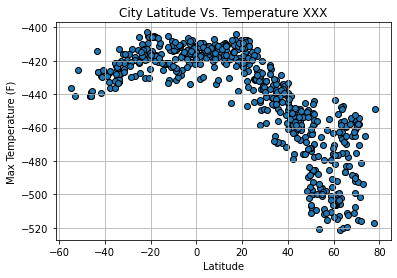

In [11]:
# Build scatter plot for latitude vs. temperature
xl = city_data_df['Lat']
yt = city_data_df['Max Temp']
plt.scatter(xl, yt, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs. Temperature XXX")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

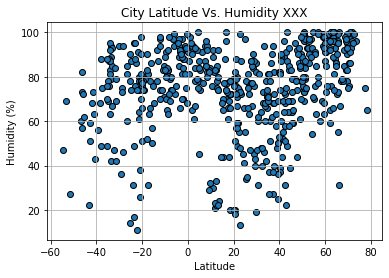

In [12]:
# Build the scatter plots for latitude vs. humidity
yh = city_data_df['Humidity']
plt.scatter(xl, yh, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity XXX")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

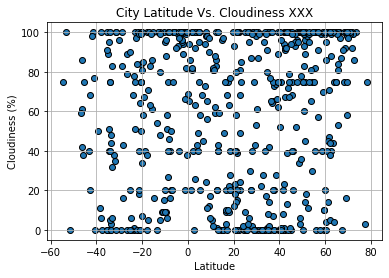

In [13]:
# Build the scatter plots for latitude vs. cloudiness
yc = city_data_df['Cloudiness']
plt.scatter(xl, yc, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness XXX")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

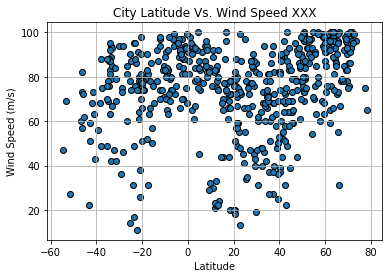

In [14]:
# Build the scatter plots for latitude vs. wind speed
yw = city_data_df['Wind Speed']
plt.scatter(xl, yh, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed XXX")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def LR(x, y, xl, yl):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y)
    plt.xlabel(xl)
    plt.ylabel(yl)    
    print(f"The r-squared is: {rvalue**2}")
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, xy=(0, 95), fontsize=14, color="red")
    plt.show()


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,-460.084,89,100,3.09,US,1669937388
2,ponta do sol,32.6667,-17.1000,-424.660,73,28,3.30,PT,1669937397
5,bathsheba,13.2167,-59.5167,-410.458,74,40,8.23,BB,1669937361
7,matara,5.9485,80.5353,-416.992,91,68,1.72,LK,1669937488
8,butaritari,3.0707,172.7902,-410.782,78,26,7.47,KI,1669937360


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lng']<= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,-460.084,89,100,3.09,US,1669937388
2,ponta do sol,32.6667,-17.1000,-424.660,73,28,3.30,PT,1669937397
3,presidencia roque saenz pena,-26.7852,-60.4388,-417.694,60,79,3.05,AR,1669937487
5,bathsheba,13.2167,-59.5167,-410.458,74,40,8.23,BB,1669937361
6,faanui,-16.4833,-151.7500,-411.034,78,83,8.72,PF,1669937368


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.698135131954456


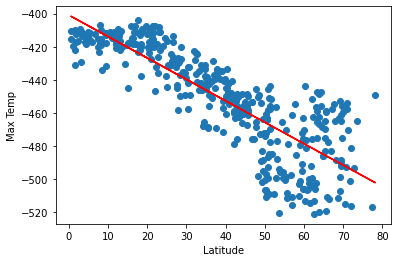

In [18]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
LR(x, y, xl="Latitude", yl="Max Temp")

The r-squared is: 0.5253024220943402


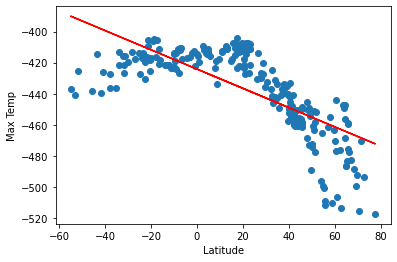

In [20]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
LR(x, y, xl="Latitude", yl="Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.21641398290551622


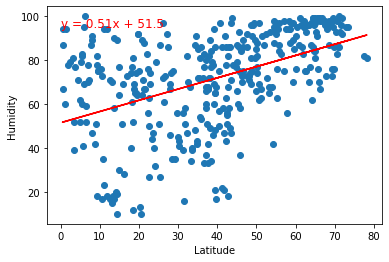

In [56]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

LR(x, y, xl="Latitude", yl="Humidity")

The r-value is: 0.0002808747046324607


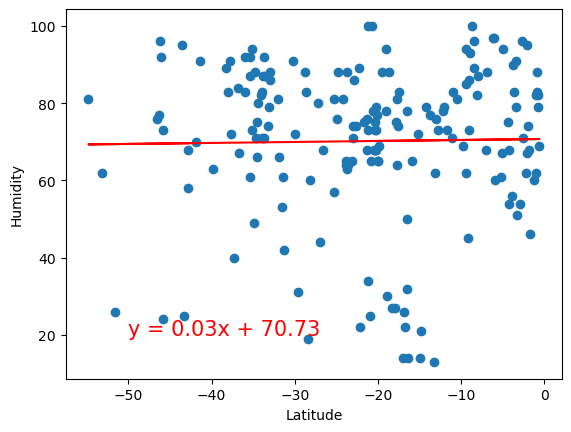

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


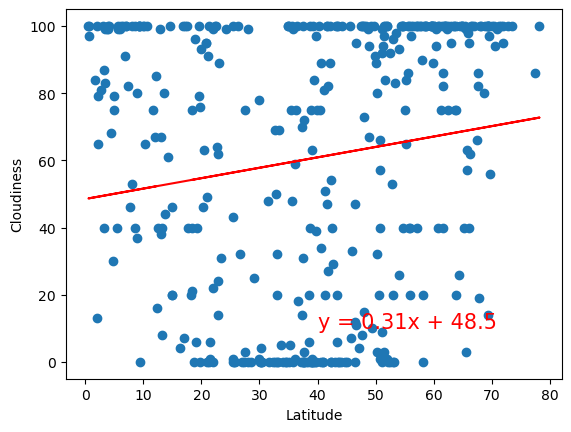

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


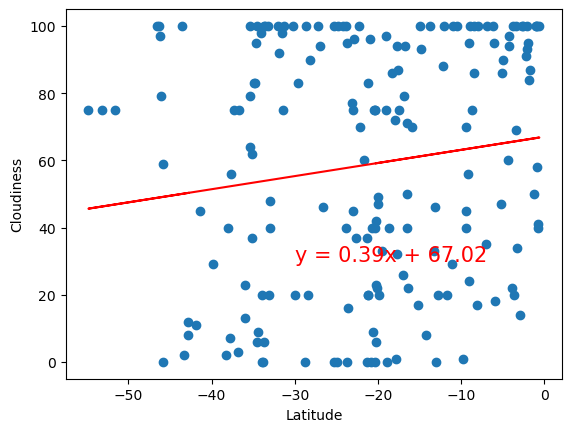

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


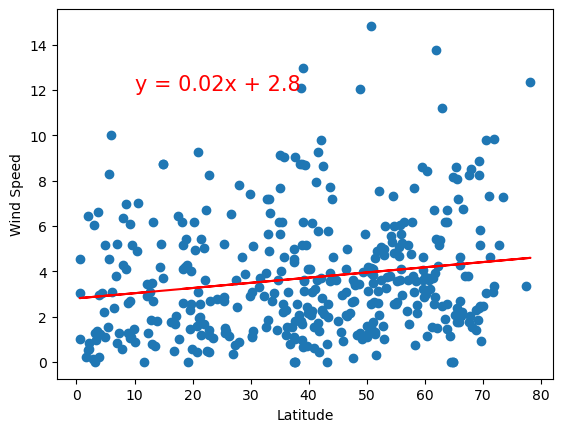

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


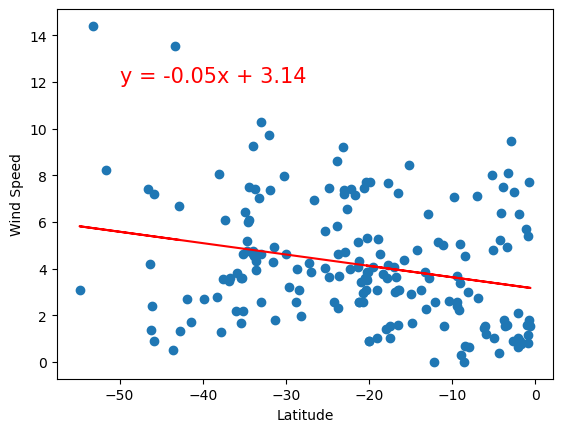

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE